## Frame the Problem and Look at the Big Picture

### The problem and how it will be solved:

The objective of this project is to accurately predict a student's grade performance based on a range of factors about the student. Creating such a model will increase the functionality of the recruiting and advising teams, as it will improve their ability to help students succeed.  An increase in graduation rates and improvement in test scores overall could not only lead to better funding for this school, but also a better reputation, which means higher enrollment numbers.  


### How to Frame the Problem:

I will go about building this model through the use of supervised learning.  This type of model classification means that I will use labeled data to train my algorithm to more accurately predict an outcome. For example, think about a kindergarten teacher teaching her students about animals.  She shows them pictures of dogs and cats and tells them which one is which.  Now, after some practice, the students will likely be able to identify a dog vs a cat when looking at different pictures not previously shown.  That is a very simplified version of what I will be doing with the data in order to predict a student's performance at the school.
I will also be using offline learning for this model, which means I am training this model over a full set of data, in contrast to just observing one data point at a time.
The specific machine learning task I will be using is regression. Regression predicts a number, whereas the other option, classification, predicts categories. I believe the regression task will be optimal because I want to be able to predict the G3 term grades of a student.


## Get the Data
### Correctly Import Data

In [2]:
# standard imports
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns

# set a random seed of 42
np.random.seed(42)

# import data to a dataframe

data = pd.read_csv('student-mat.csv')


### Check size and type of data


### Available features and their data descriptions:

1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th
to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th
to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g.
administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g.
administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation",
"course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30
min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours,
or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or
no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences_G1 - number of school absences for G1 term (numeric)
31. absences_G2 - number of school absences for G2 term (numeric)
32. absences_G3 - number of school absences for G3 term (numeric)   
these grades are related with the course math subject:
33. G1 - first term grade (numeric: from 0 to 20)
34. G2 - second term grade (numeric: from 0 to 20)
35. G3 - final grade (numeric: from 0 to 20, ← this is your output target)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,1.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,NaN,NaN,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,1.0,8.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,1,1,5,0.0,0.0,2.0,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,2,1,2,5,0.0,0.0,4.0,6,10,10


In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
count,383.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,381.000000,381.000000,381.000000,395.000000,395.000000,395.000000
mean,16.699739,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,0.669291,0.669291,4.325459,10.908861,10.713924,10.415190
std,1.280615,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,1.300132,1.300132,5.526882,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,12.000000,51.000000,19.000000,19.000000,20.000000


## Create a Test Set

### The target attribute is G3, which is the student's final grade.

In [6]:
# save G3 column as a Series named label
label = data['G3'].squeeze()

# drop G3 column from the rest of the data and call it features
features = data.drop(columns=['G3'])

### Correctly split data into training and test set

In [7]:
# split data with 80% of the instances allocated to training and 20% to testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [8]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
181,GP,M,16.0,U,GT3,T,3,3,services,other,...,2,3,1,2,3,0.0,0.0,2.0,12,13
194,GP,M,16.0,U,GT3,T,2,3,other,other,...,3,3,1,1,3,0.0,0.0,0.0,13,14
173,GP,F,16.0,U,GT3,T,1,3,at_home,services,...,3,5,1,1,3,0.0,0.0,0.0,8,7
63,GP,F,16.0,U,GT3,T,4,3,teacher,health,...,4,4,2,4,4,0.0,0.0,2.0,10,9
253,GP,M,16.0,R,GT3,T,2,1,other,other,...,3,2,1,3,3,0.0,0.0,0.0,8,9


In [9]:
data = X_train.copy()

# Discover and Visualize the Data to Gain Insights

### Thoroughly study the attributes and their characteristics

Creating histograms for each numerical column to see the statistical distribution for each feature.

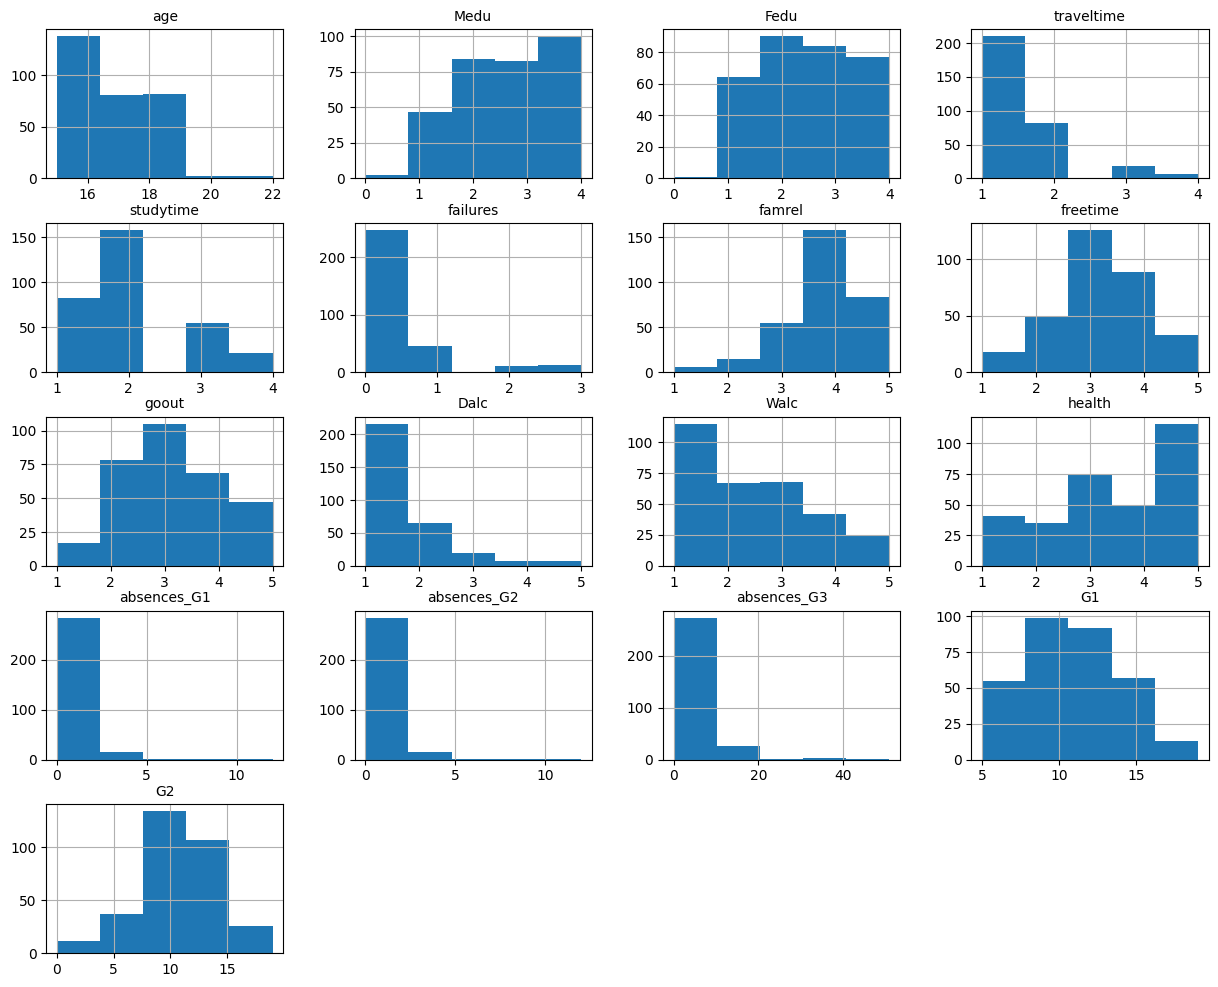

In [10]:
import matplotlib.pyplot as plt


plt.rc('font', size=14)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


data.hist(bins=5, figsize=(15, 12))
plt.show()


### Four visualizations to describe features of this data set and which ones I will focus on for this regression task

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

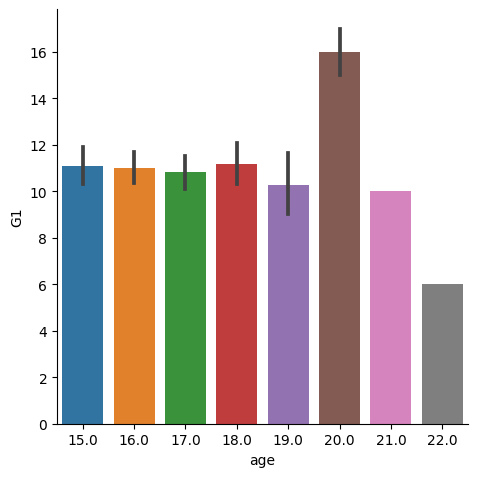

In [11]:
# Bar graph of the average grade for each age of students
sns.catplot(x='age', y = 'G1', data=data, kind='bar')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/st/77f9zfv55lv_qhmzdf4s_0bw0000gn/T/ipykernel_55589/4191898815.py:2: FutureWarning: 

The `ci` parameter is 

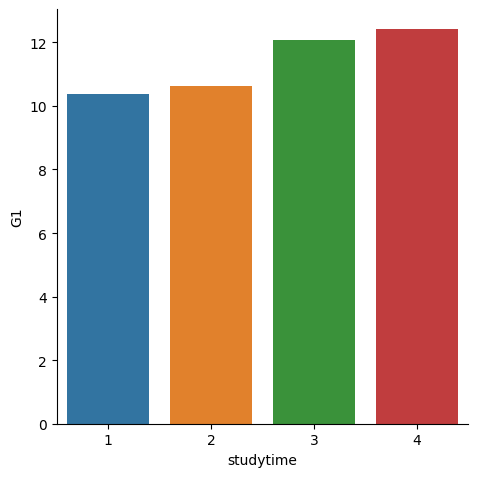

In [12]:
# bar graph showing G1 grades against how much time a student used to study.
sns.catplot(x='studytime', y='G1', data=X_train, kind='bar', ci=None)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/st/77f9zfv55lv_qhmzdf4s_0bw0000gn/T/ipykernel_55589/3574054097.py:3: FutureWarning: 

The `ci` parameter is 

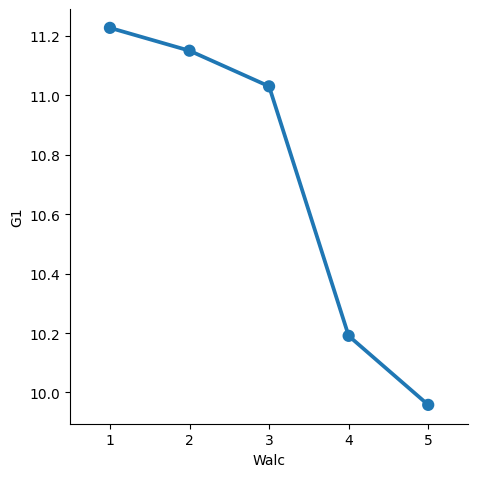

In [13]:
# Point plot showing G1 grades against Walc (how often a student drinks during the weekday)

sns.catplot(x='Walc', y='G1', data=data, kind='point', ci=None)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/st/77f9zfv55lv_qhmzdf4s_0bw0000gn/T/ipykernel_55589/1974308015.py:1: FutureWarning: 

The `ci` parameter is 

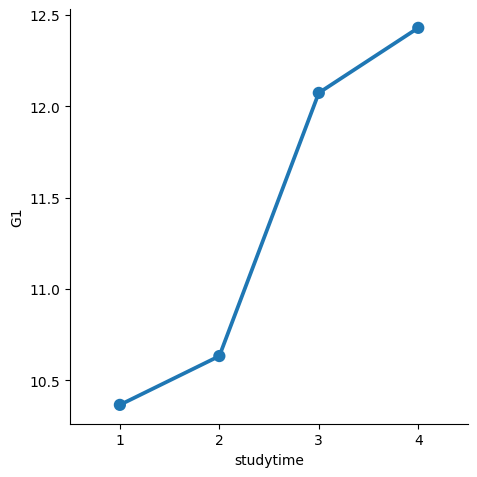

In [14]:
sns.catplot(x='studytime', y='G1', data=data, kind='point', ci=None)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

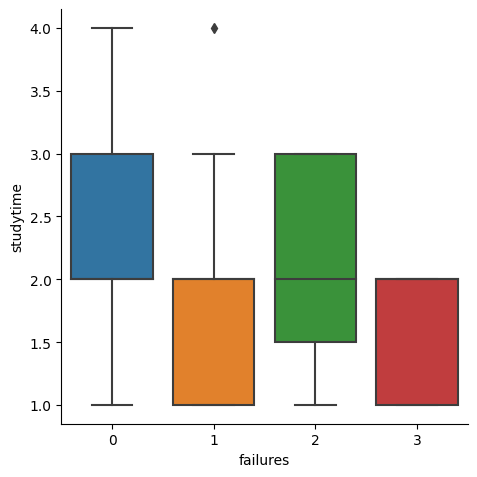

In [15]:
# Boxplot showing a distribution of number of failures against studytime.

sns.catplot(data=data, x="failures", y="studytime",kind='box')

### Study Correlations Between Discrete and Continuous numerical attributes

In [16]:
# numerical variables

attribs = ['absences_G1', 'absences_G2', 'absences_G3','age', 'G1','G2','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health']


corr_matrix = data[attribs].corr()

In [17]:
corr_matrix['studytime'].sort_values(ascending=False)

studytime      1.000000
G1             0.202975
G2             0.153854
famrel         0.089408
Medu           0.056176
age            0.028938
Fedu          -0.021699
absences_G3   -0.027807
absences_G1   -0.046094
absences_G2   -0.046094
health        -0.058622
goout         -0.103158
failures      -0.129183
traveltime    -0.129264
freetime      -0.138686
Dalc          -0.212241
Walc          -0.290409
Name: studytime, dtype: float64

## Prepare the Data

In [18]:
array = data.to_numpy()
array

array([['GP', 'M', 16.0, ..., 2.0, 12, 13],
       ['GP', 'M', 16.0, ..., 0.0, 13, 14],
       ['GP', 'F', 16.0, ..., 0.0, 8, 7],
       ...,
       ['GP', 'F', 19.0, ..., 11.0, 9, 9],
       ['GP', 'F', 17.0, ..., 0.0, 13, 15],
       ['GP', 'M', 15.0, ..., 4.0, 10, 13]], dtype=object)

In [19]:
data = data[['G1','G2','absences_G1','absences_G2','absences_G3','age','failures','studytime','famrel','goout']]
data

,G1,G2,absences_G1,absences_G2,absences_G3,age,failures,studytime,famrel,goout
181,12,13,0.0,0.0,2.0,16.0,0,2,4,3
194,13,14,0.0,0.0,0.0,16.0,0,1,5,3
173,8,7,0.0,0.0,0.0,16.0,3,2,4,5
63,10,9,0.0,0.0,2.0,16.0,0,3,3,4
253,8,9,0.0,0.0,0.0,16.0,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...
71,10,10,0.0,0.0,0.0,15.0,0,4,3,3
106,7,8,NaN,NaN,NaN,15.0,0,4,5,2
270,9,9,2.0,2.0,11.0,19.0,2,2,4,5
348,13,15,0.0,0.0,0.0,17.0,0,3,4,3


### Perform feature selection with Custom Transformer


In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
absences_G1_ix, absences_G2_ix, absences_G3_ix = 2,3,4

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, drop_columns=True):
        self.drop_columns = drop_columns

    def fit(self, X, y=None):
      return self
    
    def transform(self, X,y=None):
      sum_absences = X[:,absences_G3_ix] + X[:,absences_G2_ix] + X[:,absences_G1_ix]
      X = np.c_[X, sum_absences]
      X = np.c_[np.delete(X,[2,4],1)]

      if self.drop_columns:
        return np.c_[np.delete(X,[0,1],1)]
      else:
        return X


### Create data pipeline to handle data preparation steps
### Fill missing values with mean using SimpleImputer
### OneHotEncode categorical data

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    DropColumns(drop_columns=True),
    StandardScaler())

from sklearn.preprocessing import OneHotEncoder

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='first',sparse_output=False))


### Perform feature scaling on continuous data
### Was not necessary to use OrdinalEncoder for features
### Implement and use Column Transformer to transform categorical and numeric data

In [22]:
from sklearn.compose import ColumnTransformer

num_attributes = ['G1','G2','absences_G1','absences_G2','absences_G3','age','failures','studytime']
cat_attributes = ['romantic','internet']

preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attributes),
        ("cat", cat_pipeline, cat_attributes)])

print(preprocessing)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('dropcolumns', DropColumns()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['G1', 'G2', 'absences_G1', 'absences_G2',
                                  'absences_G3', 'age', 'failures',
                                  'studytime']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                spar

### Correctly transform training data using the above data preparation steps

In [23]:
X_train_prepared = preprocessing.fit_transform(X_train)

# Create DataFrame to view the data in an easier format
X_train_prepared = pd.DataFrame(X_train_prepared)
X_train_prepared

,0,1,2,3,4,5,6
0,-0.523284,-0.598147,-0.456744,-0.056853,-4.680443e-01,1.0,1.0
1,-0.523284,-0.598147,-0.456744,-1.254553,-7.081680e-01,0.0,1.0
2,-0.523284,-0.598147,3.628097,-0.056853,-7.081680e-01,1.0,1.0
3,-0.523284,-0.598147,-0.456744,1.140847,-4.680443e-01,0.0,1.0
4,-0.523284,-0.598147,-0.456744,-1.254553,-7.081680e-01,0.0,0.0
...,...,...,...,...,...,...,...
311,-0.523284,-1.398301,-0.456744,2.338548,-7.081680e-01,0.0,1.0
312,0.000000,-1.398301,-0.456744,2.338548,2.132726e-16,0.0,1.0
313,0.961382,1.802313,2.266484,-0.056853,1.092759e+00,0.0,1.0
314,-0.523284,0.202006,-0.456744,1.140847,-7.081680e-01,1.0,1.0


In [24]:
# testing with the parameter for the custom transformer set to false
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    DropColumns(drop_columns=False),
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='first',sparse_output=False))


num_attributes = ['G1','G2','absences_G1','absences_G2','absences_G3','age','failures','studytime','famrel','goout']

preprocessing2 = ColumnTransformer([
        ("num", num_pipeline, num_attributes)
        ])

In [25]:
# testing with the parameter for the custom transformer set to false

X_train_prepared_columns = preprocessing2.fit_transform(X_train)

# Create DataFrame to view the data in an easier format
X_train_prepared_columns = pd.DataFrame(X_train_prepared_columns)
X_train_prepared_columns

,0,1,2,3,4,5,6,7,8
0,0.332050,0.626163,-0.523284,-0.598147,-0.456744,-0.056853,0.064432,-0.144396,-4.680443e-01
1,0.643409,0.892831,-0.523284,-0.598147,-0.456744,-1.254553,1.195575,-0.144396,-7.081680e-01
2,-0.913385,-0.973844,-0.523284,-0.598147,3.628097,-0.056853,0.064432,1.644982,-7.081680e-01
3,-0.290667,-0.440508,-0.523284,-0.598147,-0.456744,1.140847,-1.066710,0.750293,-4.680443e-01
4,-0.913385,-0.440508,-0.523284,-0.598147,-0.456744,-1.254553,-1.066710,-1.039085,-7.081680e-01
...,...,...,...,...,...,...,...,...,...
311,-0.290667,-0.173840,-0.523284,-1.398301,-0.456744,2.338548,-1.066710,-0.144396,-7.081680e-01
312,-1.224743,-0.707176,0.000000,-1.398301,-0.456744,2.338548,1.195575,-1.039085,2.132726e-16
313,-0.602026,-0.440508,0.961382,1.802313,2.266484,-0.056853,0.064432,1.644982,1.092759e+00
314,0.643409,1.159499,-0.523284,0.202006,-0.456744,1.140847,0.064432,-0.144396,-7.081680e-01


## Shortlist Promising Models

### Fit three or more promising models to your data: Linear Regression, Decision Tree, and Random Forest

### How all three of these models perform with the G1 and G2 columns removed:

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# instantiate a Logistic Regression Class 
# increasing the maximum number of iterations taken for the solvers to converge
log_clf = LogisticRegression(random_state=42, max_iter=1000)

# fit the model
log_clf.fit(X_train_prepared, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [48]:
predictions = log_clf.predict(X_train_prepared)

# check RMSE scores - a score closer to 0 indicates more accurate predictions

log_mse = mean_squared_error(y_train,predictions)

log_rmse = np.sqrt(log_mse)
log_rmse

5.185788759995064

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_prepared, y_train)



LinearRegression()

In [50]:
predictions = lin_reg.predict(X_train_prepared)

lin_mse = mean_squared_error(y_train,predictions)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.1038421046598685

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X=X_train_prepared, y=y_train)




DecisionTreeRegressor()

In [ ]:
predictions = tree_reg.predict(X_train_prepared)

tree_mse = mean_squared_error(y_true = y_train, y_pred = predictions)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [52]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(X=X_train_prepared,y=y_train)




RandomForestRegressor()

In [53]:
forest_mse = mean_squared_error(y_true= y_train, y_pred = forest_reg.predict(X=X_train_prepared))

forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.4185534996007894

### How all three models perform with the G1 and G2 columns in the data:

In [30]:
lin_reg2 = LinearRegression()

lin_reg2.fit(X_train_prepared_columns, y_train)



1.7453157951692773

In [ ]:
predictions = lin_reg2.predict(X_train_prepared_columns)

lin_mse2 = mean_squared_error(y_train,predictions)

lin_rmse2 = np.sqrt(lin_mse2)
lin_rmse2

In [31]:
tree_reg2 = DecisionTreeRegressor()

tree_reg2.fit(X=X_train_prepared_columns, y=y_train)




0.08894600837060251

In [ ]:
predictions = tree_reg2.predict(X_train_prepared_columns)

tree_mse2 = mean_squared_error(y_true = y_train, y_pred = predictions)

tree_rmse2 = np.sqrt(tree_mse2)
tree_rmse2

In [32]:
forest_reg2 = RandomForestRegressor()

forest_reg2.fit(X=X_train_prepared_columns,y=y_train)



0.5525482450567829

In [ ]:
forest_mse2 = mean_squared_error(y_true= y_train, y_pred = forest_reg2.predict(X=X_train_prepared_columns))

forest_rmse2 = np.sqrt(forest_mse2)
forest_rmse2

### Compare all three models **without** G1 and G2 columns with cross validation:

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = lin_reg, X = X_train_prepared, y=y_train,scoring = 'neg_mean_squared_error',cv=3)
linreg_rmse_scores = np.sqrt(-scores)
linreg_rmse_scores

array([4.04277021, 4.17612447, 4.55866975])

In [34]:
scores = cross_val_score(estimator = tree_reg, X = X_train_prepared, y=y_train,scoring = 'neg_mean_squared_error',cv=3)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([5.1827433 , 5.59072006, 4.7584086 ])

In [35]:
scores = cross_val_score(estimator = forest_reg, X = X_train_prepared, y=y_train,scoring = 'neg_mean_squared_error',cv=3)
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores

array([4.14653477, 4.18192857, 4.31442497])

### Compare all three models **with** the G1 and G2 columns with cross validation:

In [36]:
scores = cross_val_score(estimator = lin_reg2, X = X_train_prepared_columns, y=y_train,scoring = 'neg_mean_squared_error',cv=3)
linreg2_rmse_scores = np.sqrt(-scores)
linreg2_rmse_scores

array([1.59508814, 1.81760491, 1.93564229])

In [37]:
scores = cross_val_score(estimator = tree_reg2, X = X_train_prepared_columns, y=y_train,scoring = 'neg_mean_squared_error',cv=3)
tree_reg2_rmse_scores = np.sqrt(-scores)
tree_reg2_rmse_scores

array([1.58709418, 2.60448331, 2.00475625])

In [38]:
scores = cross_val_score(estimator = forest_reg2, X = X_train_prepared_columns, y=y_train,scoring = 'neg_mean_squared_error',cv=3)
forest_reg2_rmse_scores = np.sqrt(-scores)
forest_reg2_rmse_scores

array([1.26814082, 1.50914281, 1.94001568])

## Fine Tune the System

### One model and one grid search to fine-tune the hyperparameters: Random Forest Regressor

In [39]:
# Using GridSarchCV to search for the best hyperparameters. We input what hyperparameters to try,
# and it will then use cross-validation to evaluate all the possible combinations of values.

from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4,6]}]

# prepare data
data_prepared = preprocessing.fit_transform(X_train)

# instantiate model
forest_reg = RandomForestRegressor(random_state=42)

# instantiate grid search
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)

# run grid search
grid_search.fit(data_prepared, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 6],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [41]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [42]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.956051900845279 {'max_features': 2, 'n_estimators': 3}
4.622749555662829 {'max_features': 2, 'n_estimators': 10}
4.447901741265255 {'max_features': 2, 'n_estimators': 30}
4.828312016079219 {'max_features': 4, 'n_estimators': 3}
4.46930403573766 {'max_features': 4, 'n_estimators': 10}
4.407784864976534 {'max_features': 4, 'n_estimators': 30}
4.8386672811168285 {'max_features': 6, 'n_estimators': 3}
4.439153860822914 {'max_features': 6, 'n_estimators': 10}
4.373661983696398 {'max_features': 6, 'n_estimators': 30}
4.8649108927190445 {'max_features': 8, 'n_estimators': 3}
4.528151523156381 {'max_features': 8, 'n_estimators': 10}
4.415175005506643 {'max_features': 8, 'n_estimators': 30}
4.847114487698961 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
4.774053894752573 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.956216524906605 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
4.810211704231188 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [43]:
# looking at the feature importance scores
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.03711858, 0.18949109, 0.1966822 , 0.13535622, 0.30444256,
       0.07910684, 0.05780251])

In [44]:
# displays the feature importance scores next to their attribute names
cat_encoder = preprocessing.named_transformers_["cat"]
attributes = num_attributes + cat_attributes
sorted(zip(feature_importances, attributes), reverse=True)

[(0.30444255540922166, 'absences_G3'),
 (0.19668220049424998, 'absences_G1'),
 (0.18949109280390425, 'G2'),
 (0.13535622227034377, 'absences_G2'),
 (0.07910683982194922, 'age'),
 (0.05780250855602406, 'failures'),
 (0.03711858064430713, 'G1')]

In [45]:
# Prepare test set for transformation
X_test= X_test[['G1','G2','absences_G1','absences_G2','absences_G3','age','failures','studytime','romantic','internet']]

## Correctly tranform testing data using data preparation pipline 
## Select final model and measure its performance on test set

In [55]:
# set final model
final_model = grid_search.best_estimator_

# transform test set features 
X_test_prepared = preprocessing.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_predictions

array([ 7.86666667, 12.66666667, 10.99722222, 11.53333333, 10.13333333,
        4.75444444, 11.24925565, 10.13333333,  4.75444444, 11.5       ,
       15.23531746, 13.08333333, 11.69746032, 10.1       , 10.9       ,
       11.5       , 12.75666667, 10.96666667, 12.38333333, 11.43888889,
       11.14305556, 14.54555556, 12.75666667,  8.8       , 11.48801587,
       12.52111111,  8.        , 15.23531746, 12.69666667, 13.44      ,
       12.6       , 10.11333333, 12.38333333, 10.55571429, 12.69666667,
       10.2       ,  1.        ,  9.58222222, 10.12380952,  9.84166667,
        6.8925    , 15.23531746, 12.51481481, 10.19055556, 10.12380952,
       12.05555556,  8.18333333, 10.4       , 12.6       , 12.07492063,
       10.96222222, 15.23531746, 15.23531746, 11.96730159, 10.525     ,
        9.01666667, 11.36686508, 12.05555556, 14.22970298, 15.23531746,
       13.46666667, 14.12222222,  9.11      , 10.55571429,  8.71333333,
        3.62222222,  9.47222222, 11.89285714, 14.76666667, 10.55

In [56]:
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse) 

4.464359231169406


### Present Your Solution

In conclusion, and according to the important features generated by the grid search, it seems that our G3 absences group is the number one predictor of the outcome of a student's G3 grade performance. A Random Forest Regressor was used instead of a Decision Tree Regressor even though the Decision Tree regressor RMSE score was slightly better because a Random Forest is more likely to reduce the risk of overfitting the data. These findings are very relevant to the importance of the purpose of this project, which was to identify what feature or demographic of the student could most accurately predict a student's performance at the school.  Now that we are aware that absences are what impact a student's final grade performance the most, the school can take action to try and reduce as many absences as possible. This would make sense, as the more a student misses school, the more likely they will not understand and learn necessary information related to course subjects, and therefore perform poorly on graded items.  For example, the university could have instructors keep track of attendance if they are not already, and implement a more strict policy on attendance in order to increase those numbers schoolwide. 

### Evaluation of what worked and what didn't:

Some things did not go as planned during this project - one of my biggest challenges was with the Custom Transformer and figuring out the code to correctly perform the rubric items. I also acknowledge at the end of my project that my feature_importances do not include the sum_absences column, and they also include the G1 and G2 columns even though the data was run through the numerical and categorical pipelines with the custom transformer set to true.  However, I believe it can be concluded that this does not significantly impact these findings because it can be inferred that absences would still be the most important feature, especially all of them combined. In continuing this project, I will further examine why these columns did not populate within my exaination of the feature importances.  I will also plan to investigate the other variables that were not included within this project, as they may hold some importance to the performance of students as well, in order to contribute to the overall success of this educational institution.
